In [3]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read image
path = r'E:\piezo\20211201\original\\'
name = r'1-1'
file = path+name+'.avi'#影片路徑

In [4]:
##########Choose LED ROI############
#fps = cap.get(cv2.CAP_PROP_FPS)
cap = cv2.VideoCapture(file)
total_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
LED = np.zeros((1,total_frame))
framenum = 0
while(cap.isOpened()):
    a, image = cap.read()
    if a == False:break#讀不到frame就關閉這個while loop
    elif framenum == 0:
        # Select ROI
        r = cv2.selectROI(image,False,False)
    else: pass
    # Crop image
    ROI = image[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
    # Display cropped image
    cv2.imshow("Croped Image", ROI)
    cv2.imshow('Raw image', image)
    if cv2.waitKey(1) &0xFF ==ord('q'):  #按q键退出
        break
    framenum += 1
cap.release()
cv2.destroyAllWindows() # ROI視窗關閉

In [5]:
##########Calculate mean intensity of ROI############
cap = cv2.VideoCapture(file)
framenum = 0
while(cap.isOpened()):
    a, image = cap.read()
    if a == False:break#讀不到frame就關閉這個while loop
    # Crop image
    ROI = image[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
    #print(framenum)
    LED[0,framenum] = ROI.sum(axis=0).sum()/(r[3]*r[2]*3)
    framenum += 1
cap.release()
cv2.destroyAllWindows()#ROI視窗關閉

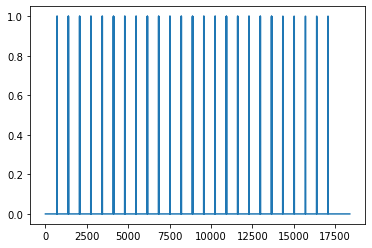

In [6]:
#########Calculate when the light is on ##########
LED_frames = np.zeros((1,total_frame))#It stores when the light is on
mean = np.mean(LED[0,:])
std = np.std(LED[0,:])
for i in range(0,total_frame):
    if LED[0,i] > mean+std*3: #閾值:超過多少代表燈亮
        LED_frames[0,i] = 1#Stimulus on
    else:
        LED_frames[0,i] = 0#Stimulus off
plt.plot(LED_frames[0,:])
#np.save(path+name+'.npy',LED_frames)